## Observations and Insights 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
mouse_study = pd.merge(mouse_df, study_df, how="outer",on="Mouse ID")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [52]:
# Checking the number of mice.
num_of_mice = len(mouse_study["Mouse ID"].unique())
num_of_mice

249

In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupe_df = pd.DataFrame(dupe_mice)
dupe_df

,0
0,g989


In [54]:
# Optional: Get all the data for the duplicate mouse ID. 
full_dupe_data = mouse_study.loc[mouse_study["Mouse ID"] == dupe_mice[0]]
full_dupe_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study["Mouse ID"].isin(dupe_mice) == False]
clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [56]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = len(clean_mouse_study["Mouse ID"].unique())
num_clean_mice

248

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stddev = clean_mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = clean_mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
reg_summary_df = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": stddev,
                              "SEM": sem})
reg_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_method = clean_mouse_study.groupby("Drug Regimen")
second_summary = agg_method.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
second_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

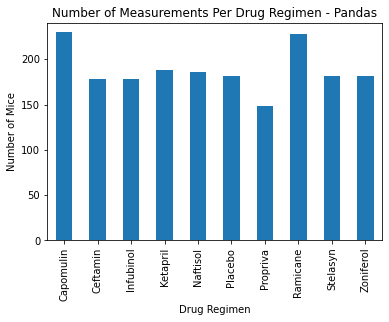

In [76]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_pandas = clean_mouse_study.groupby("Drug Regimen").count()["Mouse ID"]
plt.xlim(-0.75, len(tick_names)-0.25)
plt.ylim(0, max(bar_pandas)+10)
bar_pandas_plot = bar_pandas.plot(kind="bar", width = 0.5, title = "Number of Measurements Per Drug Regimen - Pandas")
plt.ylabel("Number of Mice")



<BarContainer object of 10 artists>

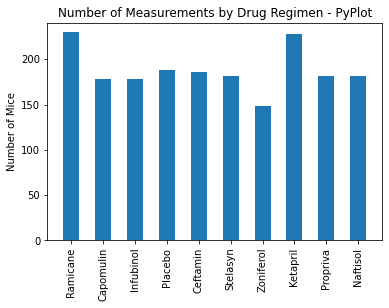

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measure_count = bar_pandas.tolist()
x_axis = np.arange(len(bar_pandas))
tick = [x for x in x_axis]
tick_names = clean_mouse_study["Drug Regimen"].unique().tolist()
plt.xticks(tick, tick_names, rotation="vertical")
plt.ylabel("Number of Mice")
plt.title("Number of Measurements by Drug Regimen - PyPlot")
plt.xlim(-0.75, len(tick_names)-0.25)
plt.ylim(0, max(bar_pandas)+10)
plt.bar(x_axis, measure_count, width = 0.5)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E7FE3E220>],
      dtype=object)

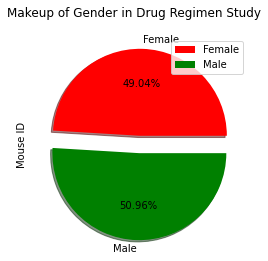

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = clean_mouse_study.groupby("Sex").count()["Mouse ID"]
mice_sex_df = pd.DataFrame(mice_sex)
# mice_sex_df
explode = (0.1, 0.1)
labels = ["Male", "Female"]
colors = ["red", "green"]
mice_sex_df.plot(subplots = True, kind="pie", colors = colors, shadow = True, explode = explode, autopct="%1.2f%%", title = "Makeup of Gender in Drug Regimen Study")


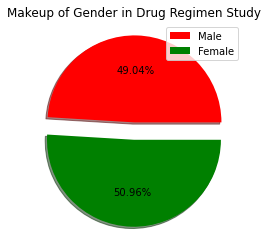

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex, colors = colors, shadow = True, explode = explode, autopct="%1.2f%%")
plt.title("Makeup of Gender in Drug Regimen Study")
plt.legend(labels, loc="best")

## Quartiles, Outliers and Boxplots

In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create data frames for each treatment regimen
capomulin = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin",:]
ramicane = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Ramicane",:]
infubinol = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Infubinol",:]
ceftamin = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Ceftamin",:]

# Pull the largest value in the Timepoint column of each treatment to find last
capo_last = capomulin.groupby('Mouse ID').max()['Timepoint']
rami_last = ramicane.groupby('Mouse ID').max()['Timepoint']
infu_last = infubinol.groupby('Mouse ID').max()['Timepoint']
ceft_last = ceftamin.groupby('Mouse ID').max()['Timepoint']

# Create treatment data frames from last values above
capo_df = pd.DataFrame(capo_last)
rami_df = pd.DataFrame(rami_last)
infu_df = pd.DataFrame(infu_last)
ceft_df = pd.DataFrame(ceft_last)

# Combine last data frame with clean data to show latest Timepoint for specific treatment
capo_comb = pd.merge(capo_df, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
rami_comb = pd.merge(rami_df, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
infu_comb = pd.merge(infu_df, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
ceft_comb = pd.merge(ceft_df, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")

# # Create lists of tumor volumes
# capo_tumor = []
# for x in  capo_comb["Tumor Volume (mm3)"]:
#     capo_tumor.append(x)
# rami_tumor = []
# for x in  rami_comb["Tumor Volume (mm3)"]:
#     rami_tumor.append(x)
# infu_tumor = []
# for x in  infu_comb["Tumor Volume (mm3)"]:
#     infu_tumor.append(x)
# ceft_tumor = []
# for x in  ceft_comb["Tumor Volume (mm3)"]:
#     ceft_tumor.append(x)
    
# Pull tumor volumes
capo_tumor = capo_comb["Tumor Volume (mm3)"]
rami_tumor = rami_comb["Tumor Volume (mm3)"]
infu_tumor = infu_comb["Tumor Volume (mm3)"]
ceft_tumor = ceft_comb["Tumor Volume (mm3)"]



In [161]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = []
drug_regimen_name = last_timepoint["Drug Regimen"].unique().tolist()
for regimen in drug_regimen_name:
    if regimen == "Capomulin":
        four_treatments.append(regimen)
    else:
        next
        if regimen == "Ramicane":
            four_treatments.append(regimen)
        else:
            next
            if regimen == "Infubinol":
                four_treatments.append(regimen)
            else:
                next
                if regimen == "Ceftamin":
                    four_treatments.append(regimen)
                else:
                    next
                    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin
capo_quartiles = capo_tumor.quantile([.25,.5,.75])
capo_lower_quartile = capo_quartiles[0.25]
capo_upper_quartile = capo_quartiles[0.75]
iqr = capo_upper_quartile - capo_lower_quartile
capo_lower_bound = capo_lower_quartile - (1.5 * iqr)
capo_upper_bound = capo_upper_quartile + (1.5 * iqr)

print("Capomulin")
print("- - - - -")
print(f"The lower quartile of Capomulin tumor volume is: {capo_lower_quartile}")
print(f"The upper quartile of Capomulin tumor volume is: {capo_upper_quartile}")
print(f"The inter quartile range (IQR) of Capomulin tumor volume is: {iqr}")
print(f"The median volume of Capomulin tumors is: {capo_quartiles[0.5]} ")
print("- - - - -")
print(f"Values below {capo_lower_bound} could be outliers.")
print(f"Values above {capo_upper_bound} could be outliers.")
print("- - - - -")

# Ramicane
rami_quartiles = rami_tumor.quantile([.25,.5,.75])
rami_lower_quartile = rami_quartiles[0.25]
rami_upper_quartile = rami_quartiles[0.75]
iqr = rami_upper_quartile - rami_lower_quartile
rami_lower_bound = capo_lower_quartile - (1.5 * iqr)
rami_upper_bound = capo_upper_quartile + (1.5 * iqr)

print("Ramicane")
print("- - - - -")
print(f"The lower quartile of Ramicane tumor volume is: {rami_lower_quartile}")
print(f"The upper quartile of Ramicane tumor volume is: {rami_upper_quartile}")
print(f"The interquartile range (IQR) of Ramicane tumor volume is: {iqr}")
print(f"The median volume of Ramicane tumors is: {rami_quartiles[0.5]} ")
print("- - - - -")
print(f"Values below {rami_lower_bound} could be outliers.")
print(f"Values above {rami_upper_bound} could be outliers.")
print("- - - - -")

# Infubinol

infu_quartiles = infu_tumor.quantile([.25,.5,.75])
infu_lower_quartile = infu_quartiles[0.25]
infu_upper_quartile = infu_quartiles[0.75]
iqr = infu_upper_quartile - infu_lower_quartile
infu_lower_bound = infu_lower_quartile - (1.5 * iqr)
infu_upper_bound = infu_upper_quartile + (1.5 * iqr)

print("Infubinol")
print("- - - - -")
print(f"The lower quartile of Infubinol tumor volume is: {infu_lower_quartile}")
print(f"The upper quartile of Infubinol tumor volume is: {infu_upper_quartile}")
print(f"The inter quartile range (IQR) of Infubinol tumor volume is: {iqr}")
print(f"The median volume of Infubinol tumors is: {infu_quartiles[0.5]} ")
print("- - - - -")
print(f"Values below {infu_lower_bound} could be outliers.")
print(f"Values above {infu_upper_bound} could be outliers.")
print("- - - - -")

# Ceftamin

ceft_quartiles = ceft_tumor.quantile([.25,.5,.75])
ceft_lower_quartile = ceft_quartiles[0.25]
ceft_upper_quartile = ceft_quartiles[0.75]
iqr = ceft_upper_quartile - ceft_lower_quartile
ceft_lower_bound = ceft_lower_quartile - (1.5 * iqr)
ceft_upper_bound = ceft_upper_quartile + (1.5 * iqr)

print("Ceftamin")
print("- - - - -")
print(f"The lower quartile of Ceftamin tumor volume is: {ceft_lower_quartile}")
print(f"The upper quartile of Ceftamin tumor volume is: {ceft_upper_quartile}")
print(f"The inter quartile range (IQR) of Ceftamin tumor volume is: {iqr}")
print(f"The median volume of Ceftamin tumors is: {ceft_quartiles[0.5]} ")
print("- - - - -")
print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")
print("- - - - -")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
- - - - -
The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The inter quartile range (IQR) of Capomulin tumor volume is: 7.781863460000004
The median volume of Capomulin tumors is: 38.125164399999996 
- - - - -
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
- - - - -
Ramicane
- - - - -
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range (IQR) of Ramicane tumor volume is: 9.098536719999998
The median volume of Ramicane tumors is: 36.56165229 
- - - - -
Values below 18.72955176 could be outliers.
Values above 53.80702538 could be outliers.
- - - - -
Infubinol
- - - - -
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The inter quartile range (IQR) of Infubinol tumor volume is: 11.477135160000003
The 

(0.0, 90.0)

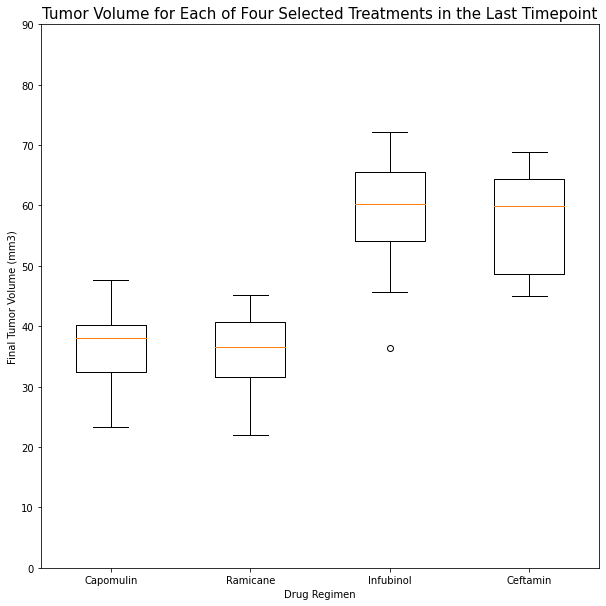

In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen_tumor_vol_data = [capo_tumor, rami_tumor, infu_tumor, ceft_tumor]
regimen_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_title("Tumor Volume for Each of Four Selected Treatments in the Last Timepoint",fontsize = 15)
ax1.set_ylabel("Final Tumor Volume (mm3)"",fontsize = 10)
ax1.set_xlabel("Drug Regimen",fontsize = 10)
ax1.boxplot(regimen_tumor_vol_data, labels = regimen_labels, widths = 0.5, vert=True)
plt.ylim(0,90)

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
